<a href="https://colab.research.google.com/github/Mona2104/localRepo/blob/main/Pytorch_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
torch.__version__

'2.3.0+cu121'

In [ ]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(X_test)

(40, 10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
 plt.figure(figsize=(10,7))
 plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
 plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')
 if predictions is not None:
  plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
 plt.legend(prop={"size":14});

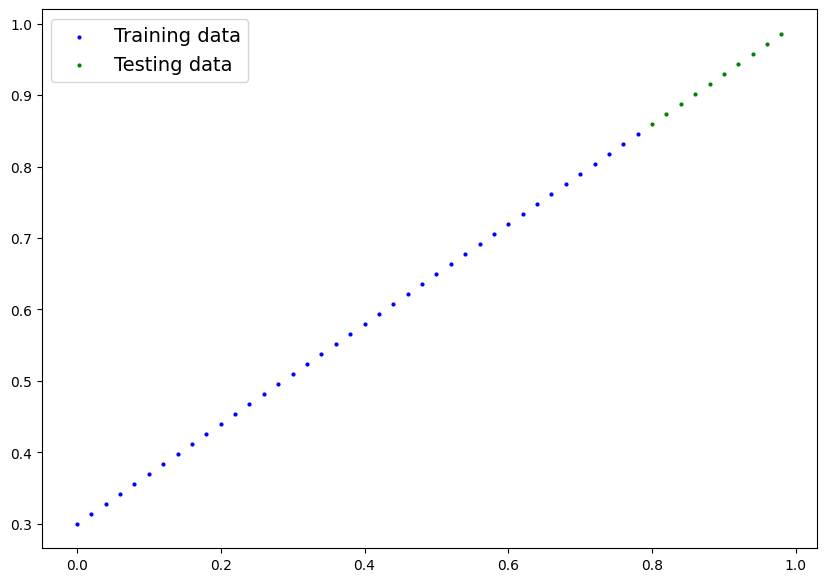

In [ ]:
plot_predictions()

In [ ]:
from torch import nn
class LinearRegressionModel(nn.Module): #almost everythinh in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,  #<- start with a random weight and try to adjust it to the ideal weight
                                  requires_grad=True,# parameter updated via gradient descent
                                  dtype=torch.float)) #torch.float32
    self.bias=nn.Parameter(torch.randn(1,  #<- start with random bias and try to adjust it to the ideal bias
                                  requires_grad=True, #<- parameter updated via gradient descent
                                  dtype=torch.float)) #torch.float32
  def forward(self,x:torch.Tensor)->torch.Tensor: #<-"x" is the input formula
    return self.weights*x+self.bias #linear regression formula

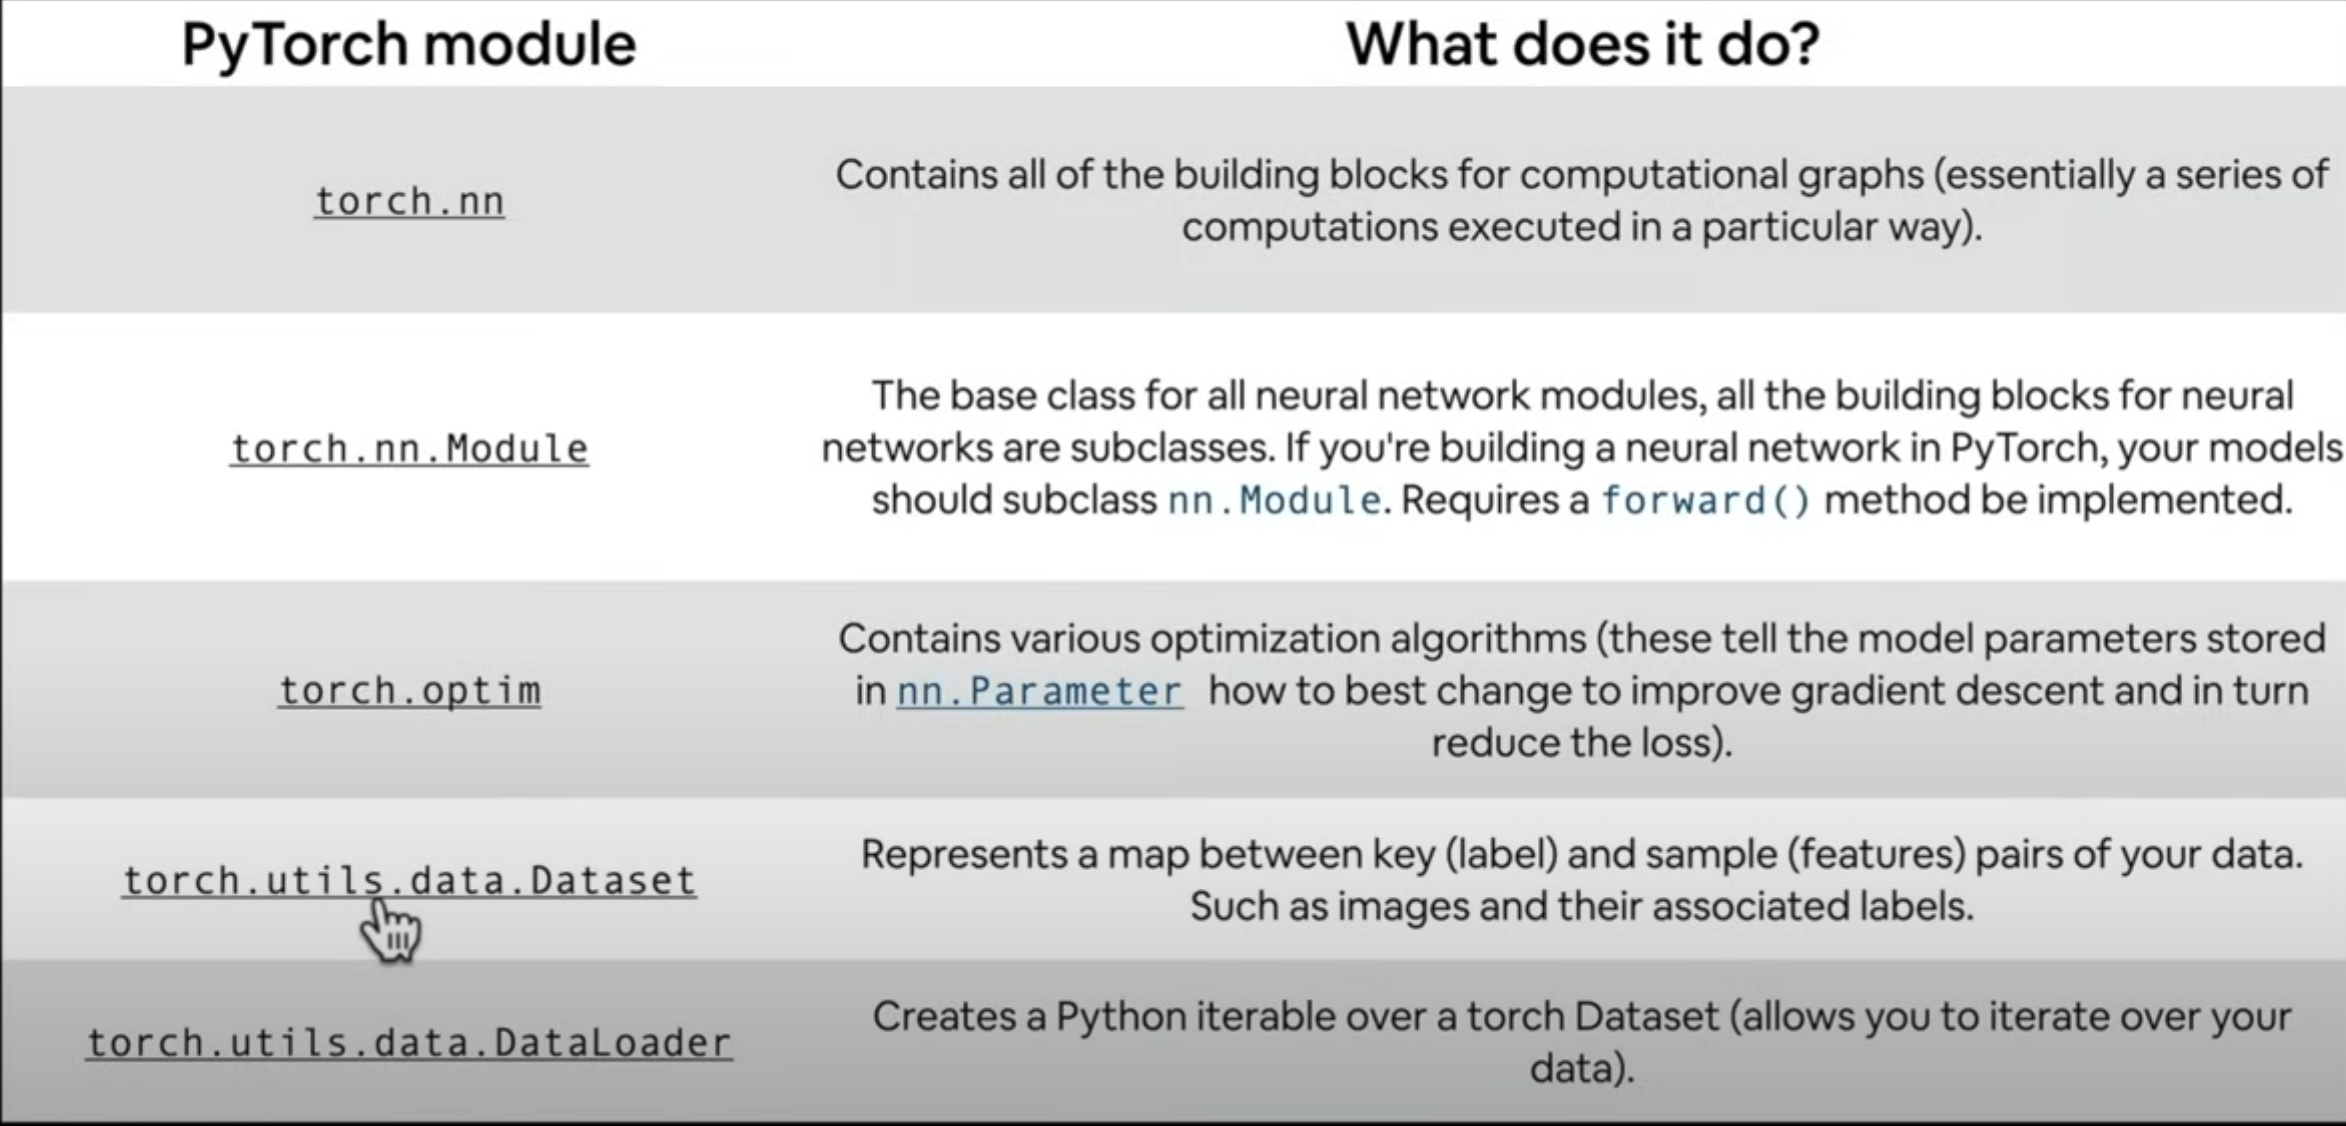

In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

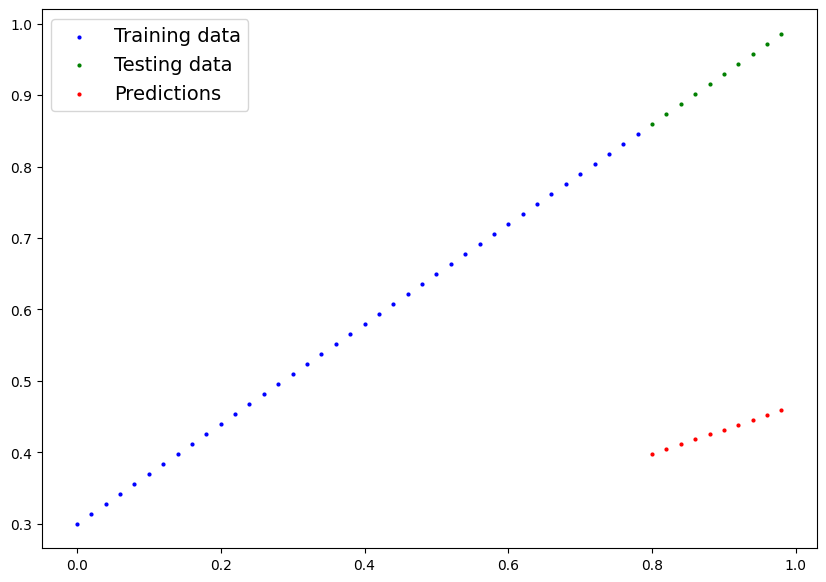

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

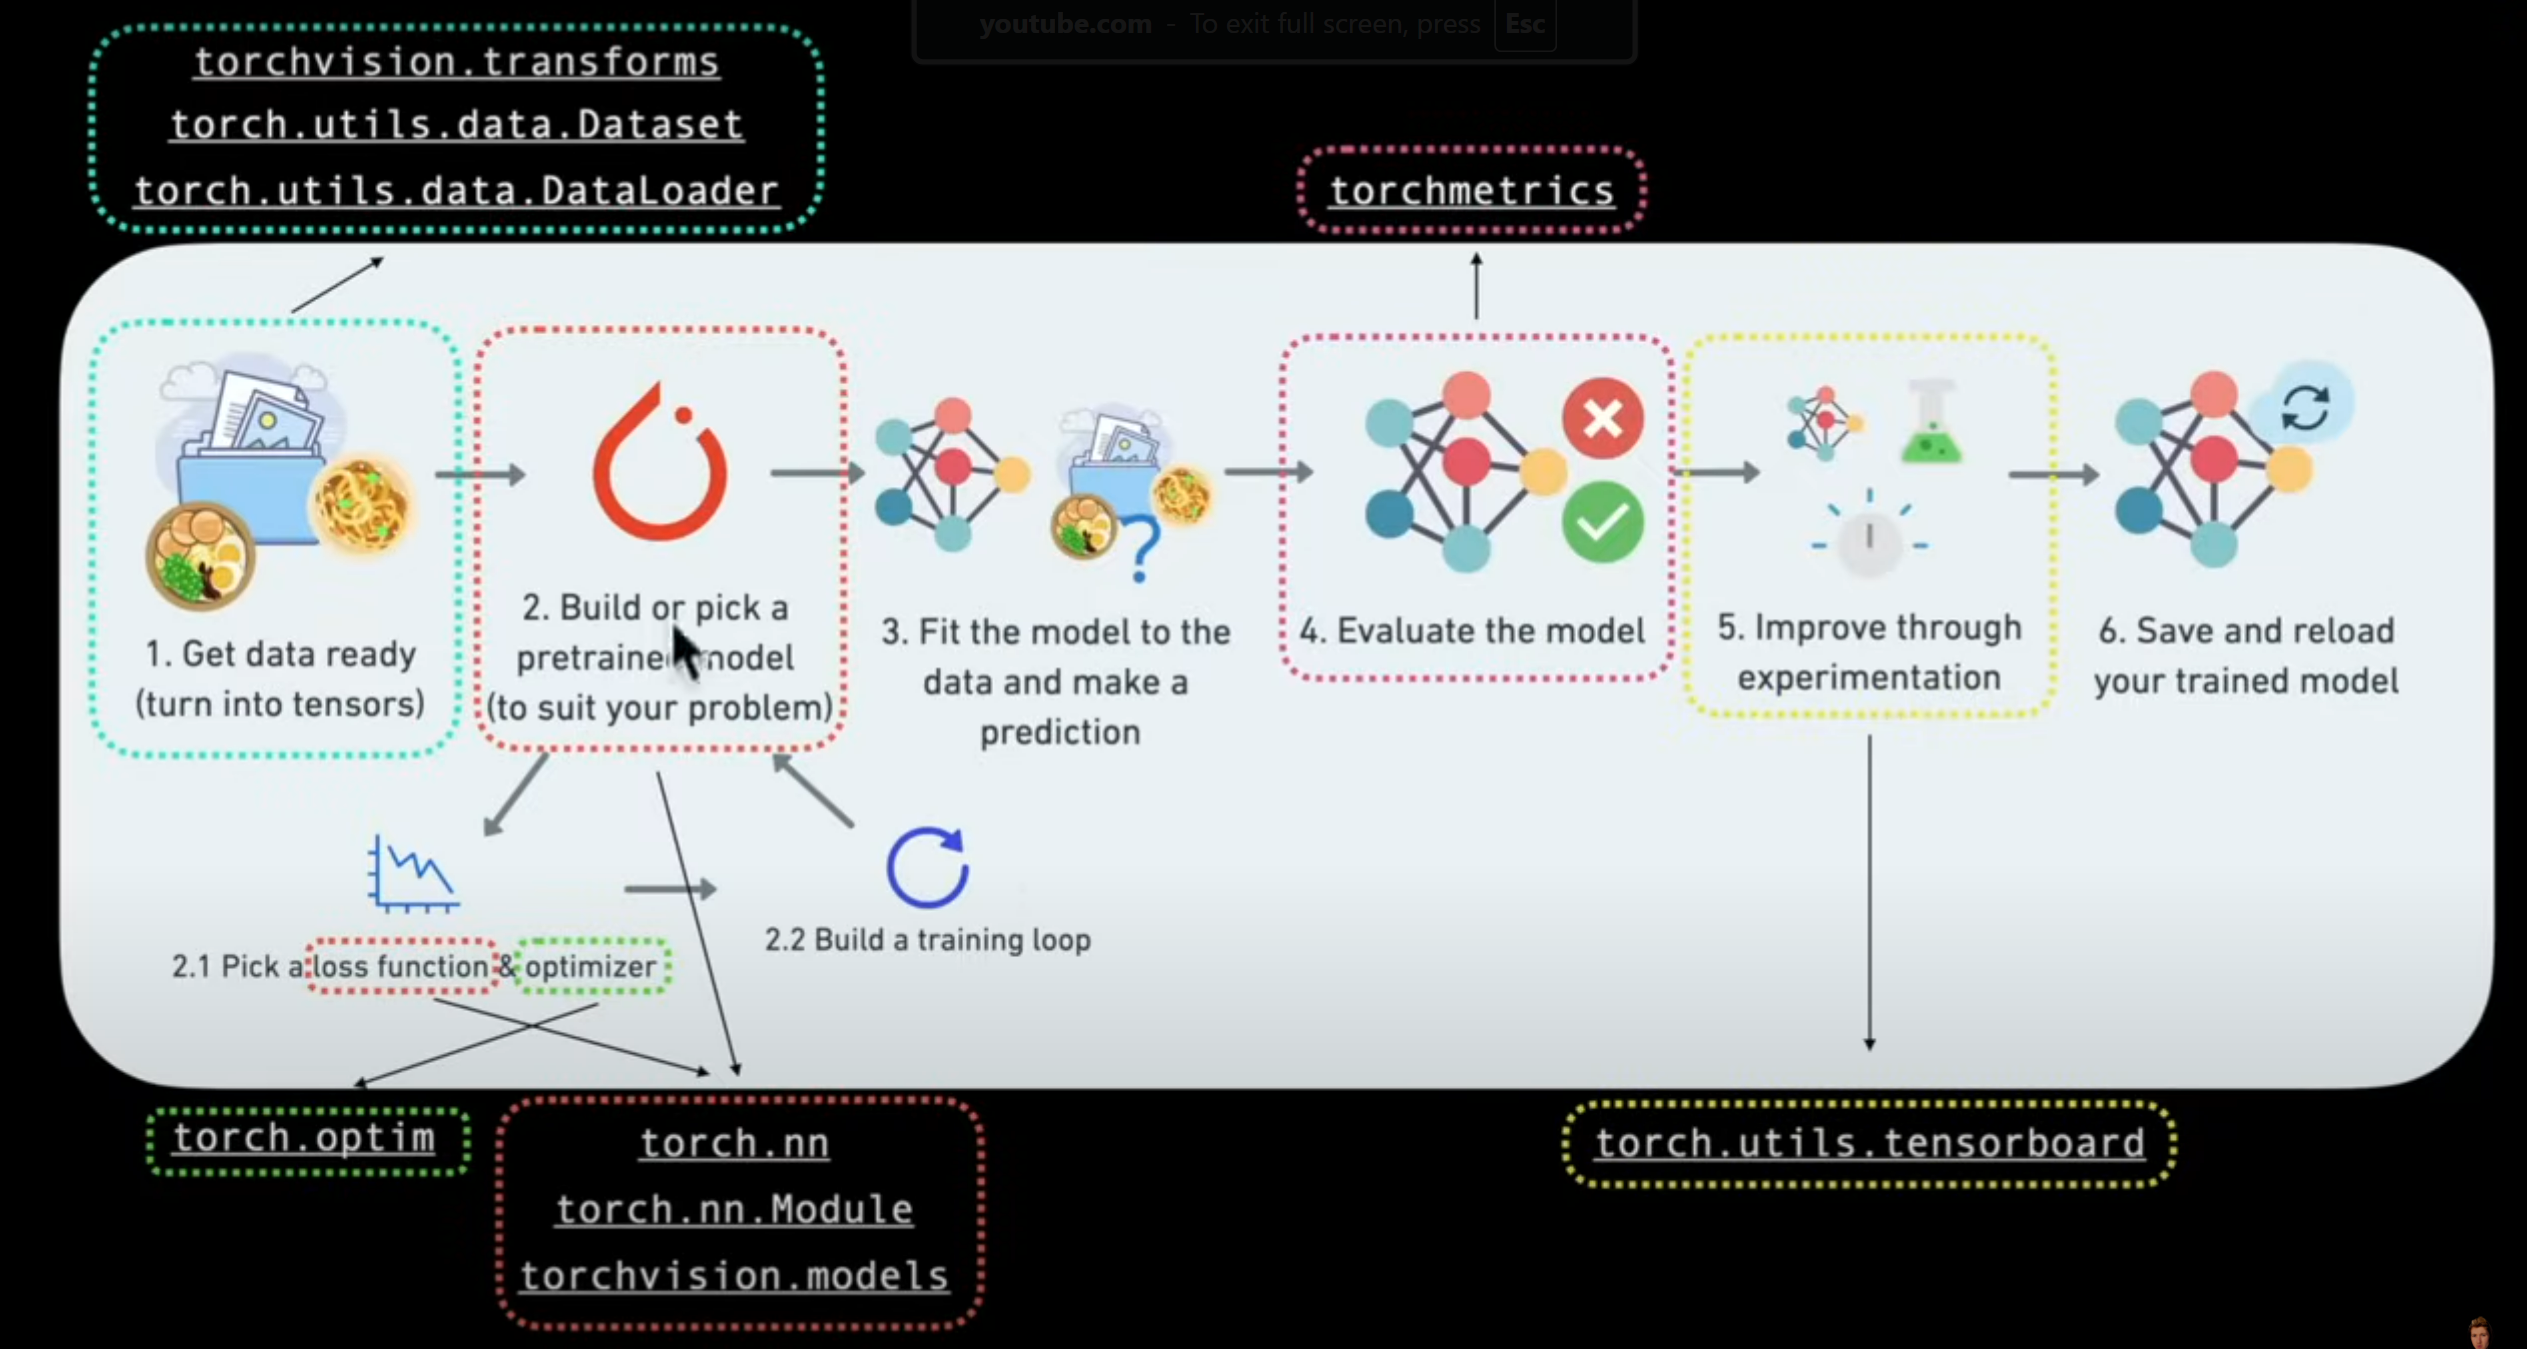

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs=200
#Loop through the data
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  #set the model to training data
  model_0.train()#train mode in pytorch sets all parameters that require gradients to require gradients
  #1. Forward pass
  y_pred=model_0(X_train)
  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)
  print(f"Loss:{loss}")
  #3.Optimizer zero grad
  optimizer.zero_grad()
  #4.Loss backward
  loss.backward()
  #5.Optimizer step
  optimizer.step() #by default how the optimizer changes will accumulate through the loop
  model_0.eval() #turns off different settings in the model not needed for evaluating
  with torch.inference_mode():
 # with torch.no_grad():
   test_pred=model_0(X_test)
   test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
     epoch_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"Epoch:{epoch}|Loss:{loss}|TestLoss:{test_loss}")
     print(model_0.state_dict())

Loss:0.31288138031959534
Epoch:0|Loss:0.31288138031959534|TestLoss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss:0.3013603389263153
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Epoch:10|Loss:0.1976713240146637|TestLoss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss:0.18615034222602844
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Epoch:20|Loss:0.08908725529909134|TestLoss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss:0.08227583020925522
Loss:0.07638873159885406
Loss:0.07160007208585739
Los

In [ ]:
with  torch.inference_mode():
  y_preds_new=model_0(X_test)

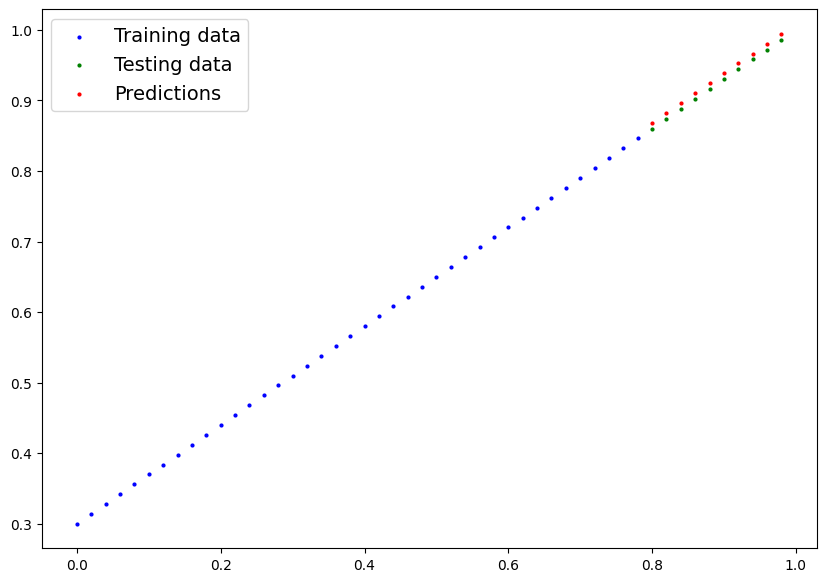

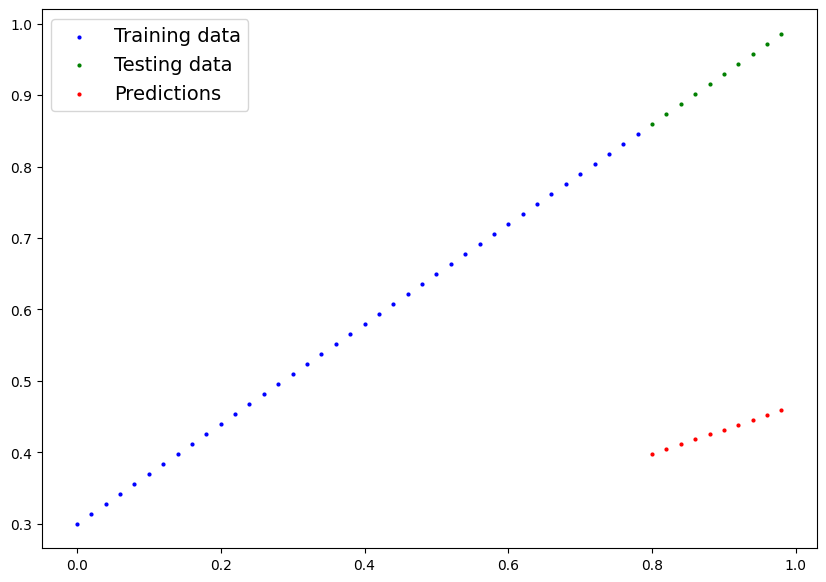

In [ ]:
plot_predictions(predictions=y_preds_new)
plot_predictions(predictions=y_preds)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

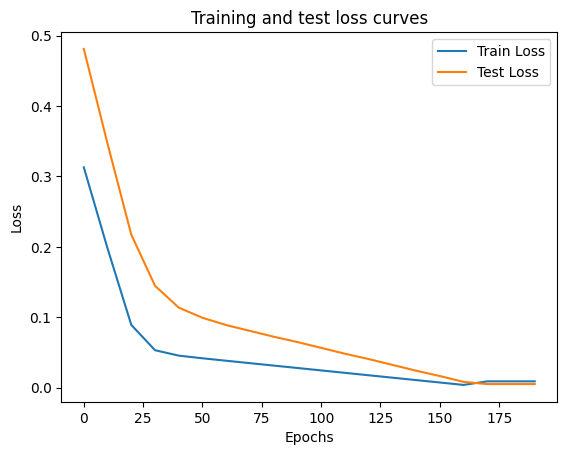

In [ ]:
 plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu()),label="Train Loss")
 plt.plot(epoch_count,test_loss_values,label="Test Loss")
 plt.title("Training and test loss curves")
 plt.ylabel("Loss")
 plt.xlabel("Epochs")
 plt.legend();

* Save and load models
* torch.save()-allows you to save a pyTorch object in pickle format
torch.load()-allows you load a saved pytorch object
* torch.nn.Module.load_state_dict()-allows to load a model's saved state dictionary

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="Pytorch_models.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
# pickling is the process by which python object hierarchy is converted to data stream

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
! ls -1 models

Pytorch_models.pth


In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.3.0+cu121'

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cpu


In [ ]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(X_test)

(40, 10)

In [ ]:
from torch import nn
class LinearRegressionModelV2(nn.Module): #almost everythinh in pytorch inherits from nn.module
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1) #also called linear transform layer
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
 X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs=200
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch:{epoch}|Loss:{loss}|TestLoss:{test_loss}")

Epoch:0|Loss:0.5551779866218567|TestLoss:0.5739762187004089
Epoch:10|Loss:0.4399680495262146|TestLoss:0.4392663538455963
Epoch:20|Loss:0.3247582018375397|TestLoss:0.30455657839775085
Epoch:30|Loss:0.20954827964305878|TestLoss:0.16984674334526062
Epoch:40|Loss:0.09433844685554504|TestLoss:0.03513689711689949
Epoch:50|Loss:0.023886386305093765|TestLoss:0.04784906655550003
Epoch:60|Loss:0.0199567973613739|TestLoss:0.04580312222242355
Epoch:70|Loss:0.016517987474799156|TestLoss:0.0375305712223053
Epoch:80|Loss:0.013089170679450035|TestLoss:0.029944902285933495
Epoch:90|Loss:0.009653178043663502|TestLoss:0.02167237363755703
Epoch:100|Loss:0.006215679459273815|TestLoss:0.014086711220443249
Epoch:110|Loss:0.002787243574857712|TestLoss:0.005814164876937866
Epoch:120|Loss:0.0012645035749301314|TestLoss:0.013801807537674904
Epoch:130|Loss:0.0012645035749301314|TestLoss:0.013801807537674904
Epoch:140|Loss:0.0012645035749301314|TestLoss:0.013801807537674904
Epoch:150|Loss:0.0012645035749301314|Tes

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

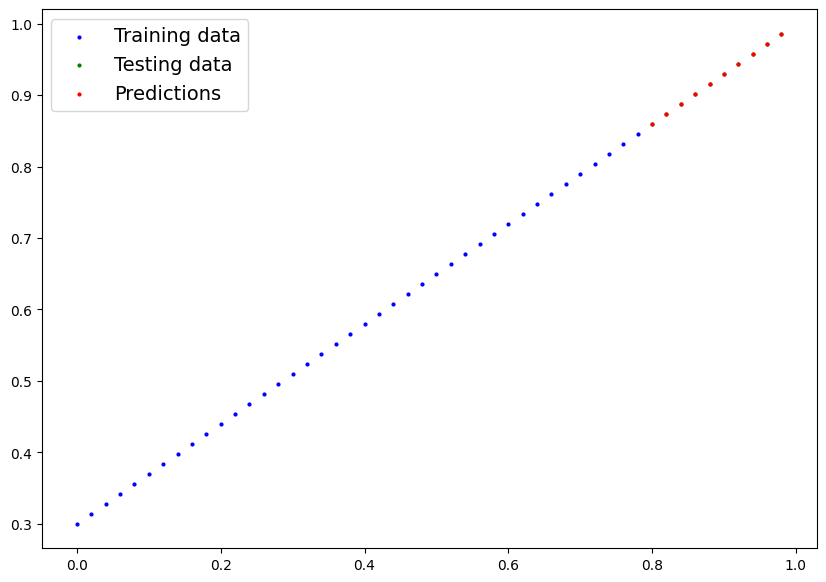

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="Pytorch_model_V2.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/Pytorch_model_V2.pth


In [ ]:
 model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
loaded_model_1=LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_1(X_test)
loaded_model_preds==y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')